### PIPLINE PROJECT

#### Data Collection --> Data pre-processing --> fiture engineering --> Modeling --> evaluation

##### Import all library


In [1]:
import re
import time
import random
import requests
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import cv2
from wordcloud import WordCloud
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, ArrayDictionary
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from datetime import datetime
from joblib import dump, load
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

##### Konstanta


In [2]:
# default stop word --> stopword bawaan dari sastrawi
DEFAULT_STOPWORD = StopWordRemoverFactory().get_stop_words()
# more stopword --> masukan kata custom yang tidak penting pada list dibawah
MORE_STOPWORD = ['pada', 'yaitu', 'yg' ]
# more alay --> masukan kata baru dalam list dibawah dg format [alay, arti]
MORE_ALAY = [
  # ['#PercumaLaporPolisi', 'percuma lapor polisi'],
  # ['#percumaLaporPolisi', 'percuma lapor polisi'],
  # ['#percumalaporpolisi', 'percuma lapor polisi'],
  ['aahhsudahlah', 'ya sudahlah'],
  ['acab', 'acap'],
  ['adad', 'adab'],
  ['adavisum', 'ada visum'],
  ['ajab', 'azab'],
  ['akb', 'ajun komisaris besar'],
  ['akhlaq', 'akhlak'],
  ['akuin', 'mengakui'],
  ['ame', 'bersama'],
  ['an', 'atas nama'],
  ['anakanak', 'anak anak'],
  ['anakdimana', 'anak dimana'],
  ['angel', 'sulit'],
  ['antekanteknya', 'antek antek'],
  ['antekantek', 'antek antek'],
  ['apaapa', 'apa apa'],
  ['apakabs', 'apa kabar'],
  ['aparatdlm', 'aparat dalam'],
  ['aphnya', 'apa'],
  ['astaga', 'astagfirullah'],
  ['astaghfirulloh', 'astagfirullah'],
  ['astagfirulloh', 'astagfirullah'],
  ['astagfiruloh', 'astagfirullah'],
  ['astaghfirullah', 'astagfirullah'],
  ['astaghfirulah', 'astagfirullah'],
  ['asu', 'anjing'],
  ['awikwok', 'lucu'],
  ['awokwokwok', 'lucu'],
  ['ayh', 'ayah'],
  ['ayhnya', 'ayah'],
  ['bahayain', 'membahayakan'],
  ['baiksemoga', 'baik semoga'],
  ['bangq', 'bang'],
  ['bangsaad', 'bangsat'],
  ['bangudah', 'bang sudah'],
  ['barubaru', 'baru baru'],
  ['baruini', 'baru baru'],
  ['batalyon', 'batalion'],
  ['bawabawa', 'bata bata'],
  ['bayarqt', 'bayar kita'],
  ['bb', 'berat badan'],
  ['becuss', 'becus'],
  ['cakap', 'becus'],
  ['benarbenar', 'benar benar'],
  ['benerbener', 'benar benar'],
  ['bkerjasama', 'bekerjasama'],
  ['boroboro', 'boro boro'],
  ['bunuhbunuhin', 'bunuh'],
  ['burukpercuma', 'buruk percuma'],
  ['busett', 'buset'],
  ['buzzerp', 'buzzer'],
  ['buzzerrp', 'buzzer'],
  ['caramya', 'cara'],
  ['carany', 'cara'],
  ['citraampmarwah', 'citra marwah'],
  ['dahga', 'haus'],
  ['dahlaa', 'ya sudah'],
  ['dajjal', 'dajal'],
  ['dakjal', 'dajal'],
  ['dblngin', 'dibilangin'],
  ['dengarkanlaah', 'dengarkan'],
  ['dengarkanlah', 'dengarkan'],
  ['details', 'detail'],
  ['dibelahdengan', 'di belah dengan'],
  ['dicariin', 'di cari'],
  ['dieminwoy', 'diem woy'],
  ['digeruduk', 'di geruduk'],
  ['digubrisjadi', 'di gubris jadi'],
  ['diilangin', 'di hilangkan'],
  ['dikatakatain', 'di katain'],
  ['dirampasmengapa', 'di rampas'],
  ['dirntai', 'di rantai'],
  ['disks', 'di siksa'],
  ['ditembakin', 'di tembak'],
  ['ditindaklanjuti', 'di tindak'],
  ['ditl', 'detail'],
  ['donkkalo', 'kalau'],
  ['durjanakondisi', 'dajal'],
  ['garanya', 'gara'],
  ['genz', 'milenial'],
  ['giless', 'gilas'],
  ['golek', 'cari'],
  ['gontaganti', 'ganti'],
  ['hajarr', 'hajar'],
  ['harsnya', 'harus'],
  ['hartanyawadan', 'harta nyawa'],
  ['hilng', 'hilang'],
  ['inikeadilan', 'keadilan'],
  ['intolerant', 'intoleran'],
  ['isilop', 'polisi'],
  ['isilov', 'polisi'],
  ['isolop', 'polisi'],
  ['janck', 'jancuk'],
  ['cok', 'jancuk'],
  ['cuk', 'jancuk'],
  ['jancokk', 'jancuk'],
  ['kajuruhan', 'kanjuruhan'],
  ['kalaua', 'kalau'],
  ['kalo', 'kalau'],
  ['kasusmrk', 'kasus mereka'],
  ['kawankawan', 'kawan'],
  ['kayak', 'kaya'],
  ['kbwah', 'bawah'],
  ['kbwh', 'bawah'],
  ['keadilanya', 'keadilan'],
  ['ketidakbecusan', 'tidak becus'],
  ['klamaan', 'kelamaan'],
  ['kuruptor', 'koruptor'],
  ['keamananpolisi', 'keamanan polisi'],
  ['ketemtraman', 'ketentraman'],
  ['masyarakatmelukai', 'masyarakat melukai'],
  ['masyarakatmerasa', 'masyarakat merasa'],
  ['masyarkt', 'masyarakat'],
  ['mbaknyakrn', 'mbaknya karena'],
  ['mbingungi', 'membingungkan'],
  ['mentalita', 'mental'],
  ['meress', 'memeras'],
  ['musti', 'mesti'],
  ['milenials', 'milenial'],
  ['milleinals', 'milenial'],
  ['millenial', 'milenial'],
  ['millenials', 'milenial'],
  ['miriss', 'miris'],
  ['mndngar', 'mendengar'],
  ['mngunggah', 'mendengar'],
  ['moga', 'semoga'],
  ['msyarakatdn', 'masyarakat dan'],
  ['mukamukanya', 'muka'],
  ['mulya', 'mulia'],
  ['nangkep', 'menangkap'],
  ['provokatorbiar', 'provokator'],
  ['personil', 'personel'],
  ['pesimisme', 'pesimis'],
  ['picek', 'buta'],
  ['polisieh', 'polisi'],
  ['provokatorbiar', 'provokator'],
  ['sepertix', 'sepertinya'],
  ['tindaklanjut', 'tindak lanjut'],
  ['wkwk', 'lucu'],
  ['wkwkwkwkwkwkwkwkwkwkwkwwkk', 'lucu'],
]


def gen_stopWord():
  wordlist = []
  with open("./kamus/id-stopwords.txt", 'r') as f:
    stop = f.read().split("\n")

  for x in stop:
    if (x not in DEFAULT_STOPWORD):
      wordlist.append(x)
  newStopWord = DEFAULT_STOPWORD + MORE_STOPWORD + wordlist
  return newStopWord

def gen_alay():
  alay = pd.read_csv('./kamus/alay.csv')
  for newAlay in MORE_ALAY:
    alay.loc[len(alay)] = newAlay
  return alay
    


# KONSTANTA ---> untuk memberi tahu bahwa variable dibawah jangan diubah
ABUSSIVE = pd.read_csv('./kamus/abusive.csv')
NORMAL_WORDS = pd.read_csv('./kamus/id-normalwords.csv')    #digunakan pada NORMALIZER()

ALAY = gen_alay()     #--> digunakan preNormalizer(), hampir mirip NORMALIZER()
STOP_WORD = ArrayDictionary(gen_stopWord())   #--> digunakan pada STOPWORDREMOVER()
STEM_FACT = StemmerFactory().create_stemmer()
STOP_FACT = StopWordRemoverFactory().create_stop_word_remover()


##### Konfigurasi project

In [3]:
DATAFRAME = pd.read_csv('./dataset/private/percumalaporpolisi_labeled.csv') #sesuaikan dengan lokasi labeled data
LOC_SAVED_FEATURE = "model/feature_tf-idf.pkl"  #lokasi file feature disimpan
LOC_SAVED_VOCAB_FEATURE = "model/vocab_selected_feature_tf-idf.pkl" #lokasi VOCAB Seleved feature disimimpan
LOC_SAVED_MODEL = "model/model_sentiment_naive.joblib"    #lokasi model disimpan

##### Function


In [4]:
def remEmoji(text):
  # Smile
  text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\)|:O)', ' positiveemoji ', text)
  # Laugh
  text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positiveemoji ', text)
  # Love
  text = re.sub(r'(<3|:\*)', ' positiveemoji ', text)
  # Wink
  text = re.sub(r'(;-?\)|;-?D|\(-?;|@-\))', ' positiveemoji ', text)
  # Sad
  text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:|:-/|:-\|)', ' negetiveemoji ', text)
  # Cry
  text = re.sub(r'(:,\(|:\'\(|:"\()', ' negetiveemoji ', text)
  return text

# preNormalize --- mengubah kata alay menjadi kata biasa. ex: "akoh" -->"aku"
def beforeAfterNormalizer(text):
  new_text = ''
  text = text.lower()
  for word in text.split():
    if (ALAY['alay'] == word).any():
      text = ALAY[ALAY['alay'] == word]['arti'].values[0]
      new_text = ' '.join([new_text, text])
    else:
      new_text = ' '.join([new_text, word])
  new_text = new_text.lower().strip()
  return new_text

# casefolding --- lowercase, remove whitwspace (spasi di awal/akhir kalimat), remove punctuation (karakter huruf) , emoji, dll
def CASEFOLDER(text):
  rem_emoji = remEmoji(text) #hapus emoji
  rem_userid=re.sub('@[\w]+','',rem_emoji).strip() #hapus mention id
  rem_hashtag = re.sub('#[\w]+','',rem_userid).strip() #hapus tagar
  rem_URL = re.sub('((www\.[^\s]+)|(https?://[^\s]+))', '', rem_hashtag) #hapus url
  rem_number = re.sub('\d+', '', rem_URL) #hapus angka
  rem_punctuation = re.sub(r'[^\w\s]', '', rem_number) #hapus tanda baca
  rem_mid_space = re.sub(' +', ' ', rem_punctuation) #hapus spasi belebih
  rem_whitespace = rem_mid_space.strip()
  # reduce character - from "kaaaaaamu" --> "kaamu"
  reduce_char = re.sub(r'(.)\1+', r'\1\1', rem_whitespace)
  lower = reduce_char.lower()
  return lower


# nomalisasi kata --- mengubah kata ke bentuk normal (kata umum yang dikenali secara luas) ex: "wis"--> "sudah"
def NORMALIZER(text):
  new_text = ''
  text = text.lower()
  for word in text.split():
    if (NORMAL_WORDS['singkat'] == word).any():
      text = NORMAL_WORDS[NORMAL_WORDS['singkat'] == word]['hasil'].values[0]
      new_text = ' '.join([new_text, text])
    else:
      new_text = ' '.join([new_text, word])
  new_text = new_text.lower().strip()
  return new_text

# remove stopword (filtering) --- menghapus kata-kita minim makna. ex--> "adalah", "yaitu"
def STOPWORDREMOVER(text):
  return STOP_FACT.remove(text)

# stemming (sastrawi) --- mengubah text ke bentuk dasarnya. ex "membuka" --> "buka"
def STEMMER(text):
  return STEM_FACT.stem(text)


In [5]:
NORMAL_WORDS.head(70)

,_id,singkat,hasil
0,1,abis,habis
1,2,accent,tekanan
2,3,accept,terima
3,4,accident,kecelakaan
4,5,achievement,prestasi
...,...,...,...
65,66,arived,tiba
66,67,article,artikel
67,68,artine,artinya
68,69,asignment,tugas


In [6]:
text = "petani bekerja untuk mencari"
text1 = "petani mereka adalah harapan bangsa"
# text1=
casefold = pd.DataFrame(data=[[text, STEMMER(text)]], columns=["Sebelum", "Sesudah"])
casefold.tail()

,Sebelum,Sesudah
0,petani bekerja untuk mencari,tani kerja untuk cari


### PRE-PROCESS PIPELINE

##### Tahapan pre-process secara umum meliputi:
1. Casefolding
2. Word Normalization
3. StopWord Removal (Filtering)
4. Stemming

note: tahapan dapat dikurangi atau ditambah sesuai kebutuhan

In [7]:
# PRE-PROCESSING --> disarankan urutanya seperti dibawah.
def PREPROCESSING(text):
  text = beforeAfterNormalizer(text)          # step tambahan
  text = CASEFOLDER(text)
  text = NORMALIZER(text)
  text = beforeAfterNormalizer(text)          # step tambahan
  text = STOPWORDREMOVER(text)
  text = STEMMER(text)
  return text

In [8]:
df = DATAFRAME.copy()
df = df[['Text','Label']].copy()
df['CleanText'] = df['Text'].apply(PREPROCESSING)
df

,Text,Label,CleanText
0,"Ini capaian Polres Bangkalan, Namun masih bany...",Positif,capai polisi resor bangkal kerja rumah selesai...
1,@anggitob29 @HumasPolri @ListyoSigitP @mohmahf...,Negatif,lapor tindak
2,"Bssn Brin Kominfo , gunanya apaan itu? Buang b...",Negatif,bssn brin komunikasi informatika guna buang bu...
3,#percumalaporpolisi anjing bet ternyata,Negatif,anjing banget
4,"Kerja belom, udah dimintain duit, kocak, tar k...",Negatif,duit kocak viral bilang oknum viral bilang ses...
...,...,...,...
628,@DivHumas_Polri Ini kapan di usut min ?\nDah c...,Negatif,usut min cape lapor ajak tonton bareng
629,Kawal terus sampai Sambo dan bininya dihukum m...,Negatif,kawal sambo istri hukum mati
630,@cha_malla Pasti malem hari dan #percumalaporp...,Negatif,malam
631,B E R A K !\n\n#TidakpercayaPOLRI #percumalapo...,Negatif,berat badan


In [9]:
DATAFRAME

,Datetime,Tweet Id,Username,Text,Label
0,2022-12-31 06:19:35+00:00,1609071754059870208,sultan_mahmud02,"Ini capaian Polres Bangkalan, Namun masih bany...",Positif
1,2022-12-30 02:37:40+00:00,1608653518281506818,Lesmono8i,@anggitob29 @HumasPolri @ListyoSigitP @mohmahf...,Negatif
2,2022-12-29 04:18:24+00:00,1608316477706469377,findnuralisah,"Bssn Brin Kominfo , gunanya apaan itu? Buang b...",Negatif
3,2022-12-29 01:39:51+00:00,1608276578055733251,yujiniece,#percumalaporpolisi anjing bet ternyata,Negatif
4,2022-12-28 17:36:03+00:00,1608154827569389570,findnuralisah,"Kerja belom, udah dimintain duit, kocak, tar k...",Negatif
...,...,...,...,...,...
628,2022-09-02 14:53:28+00:00,1565714533423149058,ruwednesia,@DivHumas_Polri Ini kapan di usut min ?\nDah c...,Negatif
629,2022-09-02 14:22:30+00:00,1565706738145558529,yuhitosan,Kawal terus sampai Sambo dan bininya dihukum m...,Negatif
630,2022-09-02 14:05:53+00:00,1565702555023204352,6undul0h,@cha_malla Pasti malem hari dan #percumalaporp...,Negatif
631,2022-09-02 11:52:35+00:00,1565669009152176134,ARomeneer,B E R A K !\n\n#TidakpercayaPOLRI #percumalapo...,Negatif


### FITUR ENGINERING
1. Fiture extraction (TF-IDF)
2. Fiture selection (CHI-SQUARE)

#### Fiture extraction (TF-IDF)

In [10]:
# GEN_FEATURE_XY --> generate feature x dan target y
def GEN_FEATURE_XY(dataFrame):
  X = dataFrame['CleanText']
  y = dataFrame['Label']
  return [X, y]

# EXTRACT_FEATURE --> mengekstraksi feature X
def EXTRACT_FEATURE(xFeature):
  vectorTF = TfidfVectorizer(ngram_range=(1,1))
  vectorTF.fit(xFeature)
  xTf = vectorTF.transform(xFeature)

  pickle.dump(vectorTF.vocabulary_,open(LOC_SAVED_FEATURE,"wb")) #Simpan vectorizer.vocabulary_
  vectorTF.vocabulary_ # fiture vocabulary
  # jumlah fiture dan nama fiture
  print("jumlah fiture TF-IDF : {}".format(len(vectorTF.get_feature_names_out())))
  print("-"*20)
  return [vectorTF, xTf]

# VEC_TABULAR --> melihat fiture TF-IDF dalam bentuk table
def VEC_TABULAR(vector, xFeature):
  x1 = vector.transform(xFeature).toarray()
  y1 = vector.get_feature_names_out()
  tabular = pd.DataFrame(data=x1, columns=y1)
  return tabular

# SORT_FEATURE --> melihat feature dari yang terbanyak
def SORT_FEATURE(vector, colName='Frekuensi', asc=False):
  nameFeature = list(vector.vocabulary_.keys())
  freqFeature = list(vector.vocabulary_.values())
  featTab = pd.DataFrame({"Nama Fitur": list(nameFeature), "Frekuensi": list(freqFeature)})
  featTab = featTab.sort_values(by=[colName], ascending=False)
  return featTab

#### TF-IDF PIPELINE

1. pisahkan variabel iput dan target (X dan y)
2. ekstrak fitur dari variabel X

In [11]:
X, y = GEN_FEATURE_XY(dataFrame=df)
vec_TF_IDF, x_tf_idf = EXTRACT_FEATURE(xFeature = X)
tabular_TF_IDF = VEC_TABULAR(vector=vec_TF_IDF, xFeature=X)
sortFeature = SORT_FEATURE(vec_TF_IDF, colName="Frekuensi", asc=False)
sortFeature.head(10)

jumlah fiture TF-IDF : 1691
--------------------


,Nama Fitur,Frekuensi
1580,zaman,1690
812,yuk,1689
558,ypi,1688
75,yoyakarta,1687
1334,yooiisemua,1686
381,yogyakarta,1685
1607,yaudalah,1684
1456,yamana,1683
1666,yakin,1682
819,yaingat,1681


#### Fiture Selections (Chi-Square)

In [12]:
# CHI_SELECT_FEATURE --> untuk menyeleksi feature berdasarkan jumlah k
def CHI_SELECT_FEATURE(vector, k=15000):
  # menentuka x_train dan y_train
  xTrain = np.array(tabular_TF_IDF)
  yTrain = np.array(y)
  #  nilai k harus lebih besar dari 0 dan kurang dari jumlah x_train
  chi2_features = SelectKBest(chi2, k=k)
  X_best = chi2_features.fit_transform(xTrain, yTrain)

  # table feature --> semakin tinggi score maka semakin baik feature
  X_best_table = pd.DataFrame(chi2_features.scores_, columns=['Nilai'])
  X_best_table['Feature'] = vector.get_feature_names_out()
  X_best_table = X_best_table.sort_values(by='Nilai', ascending=False)
  # Reduced features
  print('Original feature number:', xTrain.shape[1])
  print('Reduced feature number:', X_best.shape[1])
  return [chi2_features,X_best, X_best_table]


# GENERATE_NEW_FEATURE --> menggenerate feature yang memiliki support
def GENERATE_NEWFEATURE(vector,chi2Feature):
  feature = vector.get_feature_names_out()
  mask = chi2Feature.get_support() #mask --> dalah berupa array bool, false brrti tidak support dan sebaliknya

  FEATURE = []
  VOCABULARY = {}
  # generate feature
  for bool,f in zip(mask,feature):
    if bool:
        FEATURE.append(f)
  
  # generate vocabulary --> nilai unik
  for (k,v) in vector.vocabulary_.items():
    if k in FEATURE:
        VOCABULARY[k] = v

  return [FEATURE, VOCABULARY]

#### Featurem Selection (Chi Square) PIPELINE

In [13]:
# Seleksi fiture --> meggenerate chi-feature dan X-bet_nya
chi2_features, X_best_features, X_best_features_table = CHI_SELECT_FEATURE(
    vector=vec_TF_IDF,
    k=1600
)

# newFeature --> menggenerate feature barui berdasarkan vecTF_IDF dan chi_feature
selected_feature, vocab_selected_feature = GENERATE_NEWFEATURE(
    vector=vec_TF_IDF, chi2Feature=chi2_features)
# Menyimpan vektor dari vocabulary di atas dalam bentuk pickle (.pkl)
pickle.dump(vocab_selected_feature, open(
    LOC_SAVED_VOCAB_FEATURE, "wb"))


Original feature number: 1691
Reduced feature number: 1600


In [14]:
len(X_best_features_table)

1691

In [15]:
X_best_features_table.head(10)

,Nilai,Feature
391,29.132799,efisien
390,29.132799,efektif
1176,25.480482,presisi
985,23.937593,mungkin
1440,21.026258,spill
1196,18.778282,provokator
536,18.410966,hipokrit
160,18.410966,begitu
1327,18.183689,satu
253,15.754061,busuk


In [16]:
data_selected_feature = pd.DataFrame(X_best_features, columns=selected_feature)
data_selected_feature

,abai,about,abri,acap,activism,adad,adakan,adik,adil,adu,...,wujud,yaingat,yakin,yamana,yaudalah,yogyakarta,yooiisemua,yoyakarta,ypi,zaman
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
629,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
630,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
631,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Modeling (Naive BAyes)

splitting data training dan testing

In [17]:
# definisi variabel input dan target
feat_input = X_best_features
feat_target = df['Label']
#Memisihkan data training dan data testing dengan perbandingan 80:20
x_train, x_test, y_train, y_test = train_test_split(feat_input, feat_target, test_size=0.2, random_state=0)

#print
print('Banyak data x_train :',len(x_train))
print('Banyak data x_test  :',len(x_test))
print('Banyak data y_train :',len(y_train))
print('Banyak data y_test  :',len(y_test))

Banyak data x_train : 506
Banyak data x_test  : 127
Banyak data y_train : 506
Banyak data y_test  : 127


#### Training Model, Evalusi, Validasi

In [26]:
# TRAIN_MODEL_NB --> melatih model naive bayes, menyimpanya pada folder model
def TRAIN_MODEL_NB(xTrain, yTrain):
  start = datetime.now()
  NB = MultinomialNB()
  # fit model
  model = NB.fit(xTrain, yTrain)
  # save model
  dump(model, filename=LOC_SAVED_MODEL)
  finish = datetime.now()
  time_process = finish - start
  print("Duration : {}".format(time_process))
  return model


# EVALUATE_MODEL_NB --> mengevaluasi model dengan menampilkan recall, accuracy dan confussion metrics
def EVALUATE_MODEL_NB(predicted, yTest):
  # Compute performance manually
  NewprediksiBenar = (predicted == yTest).sum()
  NewprediksiSalah = (predicted != yTest).sum()
  CM = confusion_matrix(yTest, predicted)

  TP = CM[0][0]
  TN = CM[1][1]
  FP = CM[0][1]
  FN = CM[1][0]

  accuracy = NewprediksiBenar / (NewprediksiBenar + NewprediksiSalah) * 100
  precision = TP / (TP + FP)
  recall = TP / (TP + FN)

  print("prediksi benar: {} data".format(NewprediksiBenar))
  print("prediksi salah: {} data".format(NewprediksiSalah))
  print("Akurasi Algoritme: {}%".format(round(accuracy, 2)))
  print("-" * 30)

  # print("TRUE NEGATIVE (TN):", TN)
  # print("FALSE NEGATIVE (FN):", FN)
  # print("TRUE POSITIVE (TP):", TP)
  # print("FALSE POSITIVE (FP):", FP)
  # print("PRECISION: {}%".format(round(precision * 100, 2)))
  # print("RECALL: {}%".format(round(recall * 100, 2)))
  print(classification_report(yTest, predicted))
  return [NewprediksiBenar, NewprediksiSalah, accuracy, precision, recall]


# VALISATE_MODEL_NB --> validasi model
def VALIDATE_MODEL_NB(model, xBeast, dataLabel):
  cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=2)
  accuracy = (cross_val_score(
    model, xBeast, dataLabel, cv=cv, scoring='accuracy'))
  score_accuracy = np.mean(accuracy)
  print("accuracy: ", accuracy)
  print("skor accuracy: ", score_accuracy)


# RUN_SAVED_MODEL --> memanggil model dan melakukan klasifikasi
def RUN_SAVED_MODEL(modelNB, vocab):
  print("======== Klasidfikasi ========")
  print("ketik 'stop' -untuk-> berhenti")
  print('-' * 30)
  text = ''
  loaded_vec = TfidfVectorizer(
      decode_error="replace", vocabulary=set(vocab))
  while (text == ''):
    text = input("Masukan kata-kata anda. ketik 'stop' untuk melewati step ini.")
    if(not text == 'stop'):
      tweet = PREPROCESSING(text)
      hasil = modelNB.predict(loaded_vec.fit_transform([tweet]))
      print("{} -----> {}".format(text, hasil[0]))
      print('-' * 30)
      text = ''
    else:
      textTemplate = PREPROCESSING("Hari ini saya bahagia!")
      result = modelNB.predict(loaded_vec.fit_transform([textTemplate]))
      print("Hari ini saya bahagia! -----> {}".format(result[0]))
      print("(text template)")
      print('{} end {}'.format("=" * 12, "=" * 13))


Training pipeline

In [19]:
# training
model = TRAIN_MODEL_NB(x_train, y_train)
# prediction
prediction = model.predict(x_test)
# evaluasi
sumBenar, sumSalah, accuracy, precission, recall = EVALUATE_MODEL_NB(predicted=prediction, yTest=y_test)

# validasi
validation = VALIDATE_MODEL_NB(model, xBeast=X_best_features, dataLabel=df['Label'])

Duration : 0:00:00.675303
prediksi benar: 95 data
prediksi salah: 32 data
Akurasi Algoritme: 74.8%
------------------------------
              precision    recall  f1-score   support

     Negatif       0.75      1.00      0.86        95
      Netral       0.00      0.00      0.00        29
     Positif       0.00      0.00      0.00         3

    accuracy                           0.75       127
   macro avg       0.25      0.33      0.29       127
weighted avg       0.56      0.75      0.64       127



c:\Users\acer\anaconda3\envs\envForTBI\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\envs\envForTBI\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\envs\envForTBI\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


accuracy:  [0.74015748 0.7007874  0.70866142 0.74015748 0.74015748 0.70866142
 0.7007874  0.72440945 0.77952756 0.7480315 ]
skor accuracy:  0.7291338582677167


In [27]:
# RUN MODEL --> memanggil fungsi deployment
vocab_file = pickle.load(open(LOC_SAVED_VOCAB_FEATURE, "rb"))
model_file = load(LOC_SAVED_MODEL)
RUN_SAVED_MODEL(modelNB=model_file, vocab=vocab_file)

======== Klasidfikasi ========
ketik 'stop' -untuk-> berhenti
------------------------------
Hari ini saya bahagia! -----> Negatif
(text template)
============ end =============


#### Word Cloud

In [21]:
# DOWNLOAD_IMAGE --> mengunduh dan menyimpan gambar
def DOWNLOAD_IMAGE(url, filename='pict01.jpg'):
  savePath = ''.join(['./assets/', filename])
  with open(savePath, 'wb') as handle:
    response = requests.get(url, stream=True)
    if not response.ok:
      print(response)

    for block in response.iter_content(1024):
      if not block:
        break
      handle.write(block)
      return block

# WORDCLOUD --> memunculkan kata ururt dari palimng banyak yang disebut
def WORDCLOUD_BASIC(dataFrame=df,colWithValue='Label', value='Positive', col="CleanText"):
  print('{} {} Words {}'.format('-' * 25, value, '-' * 25))
  words = " ".join(df[df[colWithValue] == value][col].values)
  wordcloud = WordCloud(width=350, height=200, random_state=21,
                        max_font_size=110).generate(words)
  plt.figure(figsize=(10, 7))
  plt.imshow(wordcloud, interpolation="bilinear")
  plt.axis('off')
  plt.show()
  print('-' * 70)

# PIE CHART
def CHART_PIE(dataFrame,colWithValue='Label', valToExplode="Positif"):
  totalData = len(dataFrame)
  labels = dataFrame[colWithValue].unique()
  dictPercent = {}

  for key in labels:
      total = len(dataFrame[dataFrame[colWithValue] == key])
      percent = total/totalData * 100
      print("total {} : {}".format(key, total))
      dictPercent[key] = round(percent, 3)

  dataValue = np.array(list(dictPercent.values()))
  dataLabel = list(dictPercent.keys())

  plt.pie(dataValue, labels=dataLabel, autopct='%1.1f%%',
          startangle=90)
  plt.axis('equal')
  plt.legend()
  plt.show()

# imgUrl = "https://raw.githubusercontent.com/ksnugroho/klasifikasi-spam-sms/master/img/cloud.jpg"
# img = DOWNLOAD_IMAGE(url=imgUrl)
# originalImage = cv2.imread(img)
# grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
# (thresh, cloud_mask) = cv2.threshold(grayImage, 100, 255, cv2.THRESH_BINARY)

# def WORDCLOUD_CLOUD(colWithValue='Label', value='Positive', col="CleanText"):
#   print('{} {} Words {}'.format('-' * 15, value, '-' * 15))
#   words = " ".join(df[df[colWithValue] == value][col].values)
#   wordcloud = WordCloud(width=350,
#                         height=200,
#                         margin=10,
#                         background_color='white',
#                         colormap='Dark2',
#                         max_font_size=200, min_font_size=25,
#                         mask=cloud_mask, contour_width=10, contour_color='firebrick',
#                         max_words=100).generate(words)
#   plt.figure(figsize=(10, 8))
#   plt.imshow(wordcloud, interpolation="bilinear")
#   plt.axis('off')
#   plt.show()
#   print('-' * 50)


------------------------- Negatif Words -------------------------


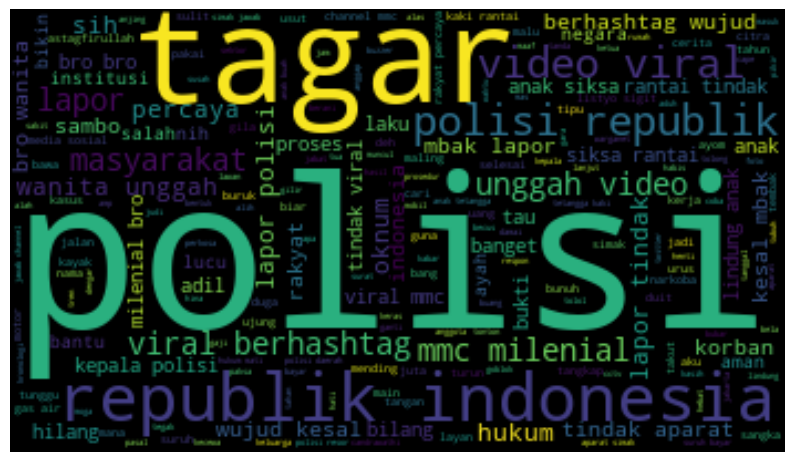

----------------------------------------------------------------------
------------------------- Netral Words -------------------------


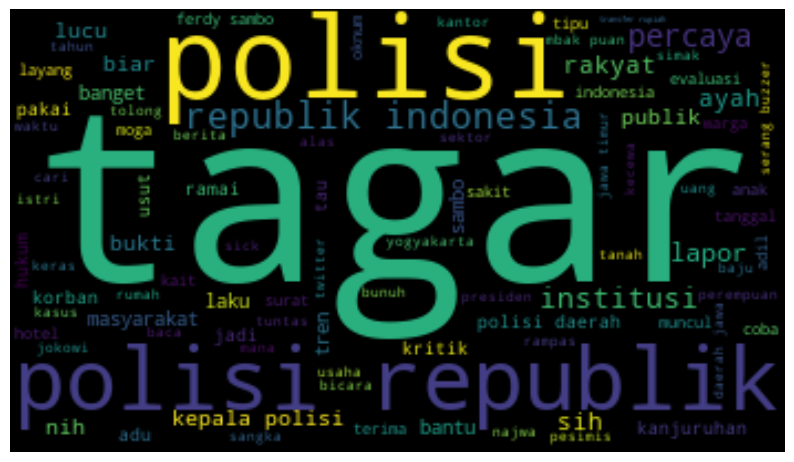

----------------------------------------------------------------------
------------------------- Positif Words -------------------------


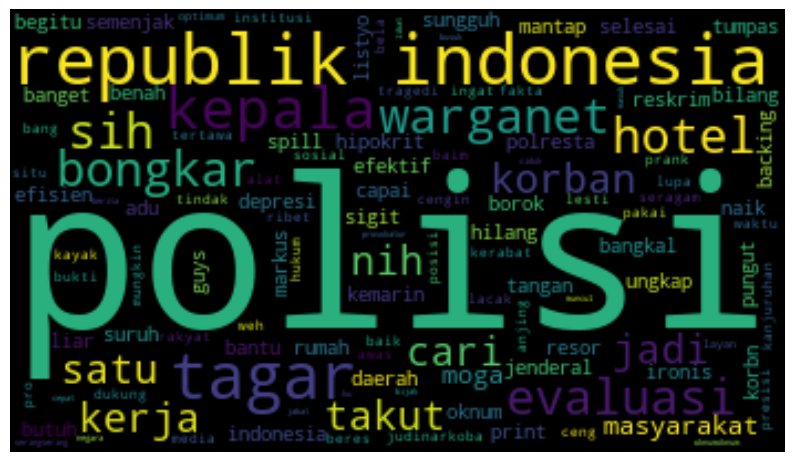

----------------------------------------------------------------------


In [22]:
labeled_value = ["Negatif", "Netral", "Positif"]
for labelVal in labeled_value:
  WORDCLOUD_BASIC(dataFrame=df, colWithValue='Label', value=labelVal)


### Untuk laporan

total Positif : 15
total Negatif : 463
total Netral : 155


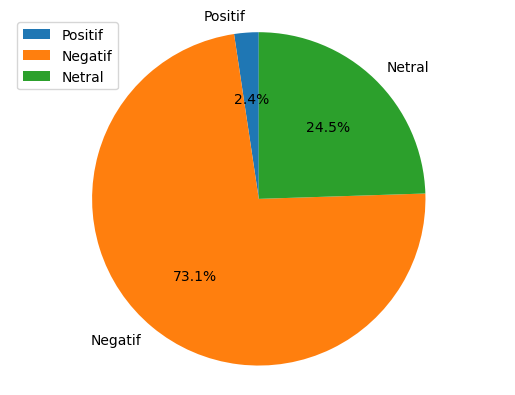

In [23]:
CHART_PIE(df, 'Label')

In [28]:
df[['Text', 'Label', 'CleanText']].head(10)

,Text,Label,CleanText
0,"Ini capaian Polres Bangkalan, Namun masih bany...",Positif,capai polisi resor bangkal kerja rumah selesai...
1,@anggitob29 @HumasPolri @ListyoSigitP @mohmahf...,Negatif,lapor tindak
2,"Bssn Brin Kominfo , gunanya apaan itu? Buang b...",Negatif,bssn brin komunikasi informatika guna buang bu...
3,#percumalaporpolisi anjing bet ternyata,Negatif,anjing banget
4,"Kerja belom, udah dimintain duit, kocak, tar k...",Negatif,duit kocak viral bilang oknum viral bilang ses...
5,"In great power, comes great responsibility, bu...",Negatif,in great power great responsibility but not po...
6,@Midjan_La_2 Indonesia krisis keamanan😐😐😐Polis...,Negatif,indonesia krisis aman polisi guna uang hukum
7,Iseng tanya kasusku yg pernah terjadi di tahun...,Negatif,iseng kasus tahun eh usut kasus polisi
8,https://t.co/5oH90QbiLP\n\nLembaga Bantuan Huk...,Netral,lembaga bantu hukum majelis wilayah korps alum...
9,Sedangkan Pihak POLSEK Waru bisa mengamanin pe...,Netral,polisi sektor waru mengamanin laku waktu jam p...
